In [1]:
#Import the necessary libraries.
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
#First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


In [2]:
display(customer_df.shape)
display(customer_df.head())
display(customer_df.info())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [3]:
#Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
cols = []
for i in customer_df.columns:
    cols.append(i.lower())
customer_df.columns = cols
customer_df.columns = customer_df.columns.str.replace(' ', '_')
display(customer_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
#Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
display(customer_df.shape)
customer_df.head()

(9134, 24)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df = customer_df.select_dtypes(np.number)
display(numerical_df.head())
numerical_df.shape

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


(9134, 8)

In [7]:
for i in numerical_df.columns:
    print(numerical_df[i].nunique()/len(numerical_df))


0.8803372016641121
0.6233851543682943
0.022115174074885044
0.003941318151959711
0.010948105977665865
0.0006568863586599519
0.0009853295379899278
0.559010291219619


In [8]:
continuous_df = customer_df[['customer_lifetime_value','income','total_claim_amount', 'monthly_premium_auto', 'months_since_last_claim','months_since_policy_inception' ]]
discrete_df = customer_df[['number_of_open_complaints','number_of_policies']]
#stil not sure about discrete_df with columns called 'monthly_premium_auto', 'months_since_last_claim','months_since_policy_inception' but decided to take to discrete and then after some time put it to continiues 
display(discrete_df.head())
display(continuous_df.head())

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,2763.519279,56274,384.811147,69,32,5
1,6979.535903,0,1131.464935,94,13,42
2,12887.431650,48767,566.472247,108,18,38
3,7645.861827,0,529.881344,106,18,65
4,2813.692575,43836,138.130879,73,12,44


In [8]:
#Plot a correlation matrix, comment what you see.

,number_of_open_complaints,number_of_policies
number_of_open_complaints,1.000000,0.001498
number_of_policies,0.001498,1.000000


<Axes: >

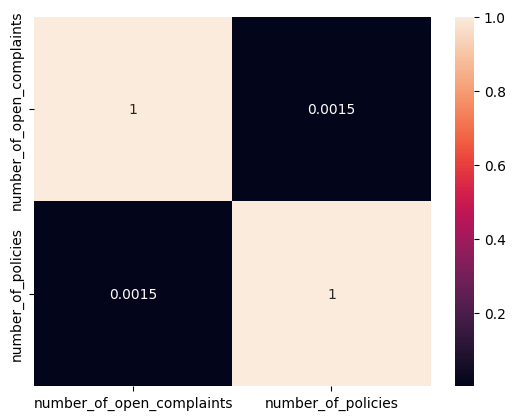

In [9]:
d_corr= discrete_df.corr()
display(d_corr) 
sns.heatmap(d_corr, annot=True)

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
customer_lifetime_value,1.000000,0.024366,0.226451,0.396262,0.011517,0.009418
income,0.024366,1.000000,-0.355254,-0.016665,-0.026715,-0.000875
total_claim_amount,0.226451,-0.355254,1.000000,0.632017,0.007563,0.003335
monthly_premium_auto,0.396262,-0.016665,0.632017,1.000000,0.005026,0.020257
months_since_last_claim,0.011517,-0.026715,0.007563,0.005026,1.000000,-0.042959
months_since_policy_inception,0.009418,-0.000875,0.003335,0.020257,-0.042959,1.000000


<Axes: >

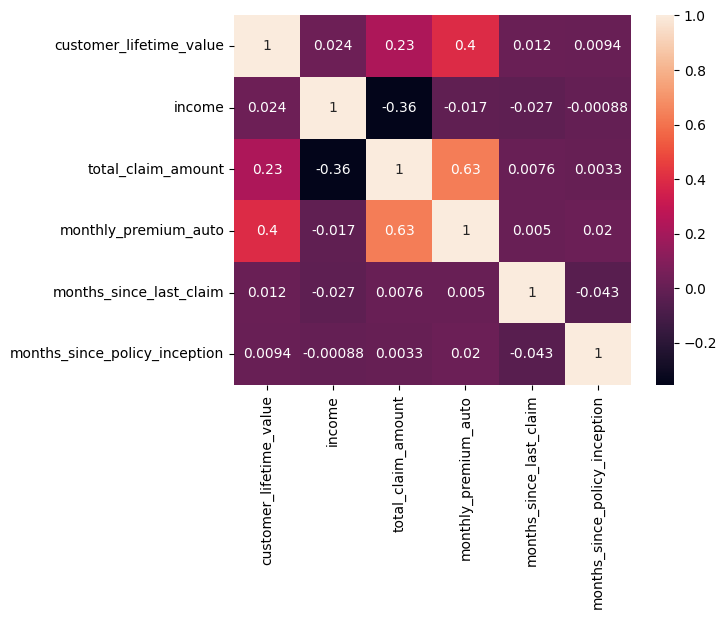

In [10]:
c_corr= continuous_df.corr()
display(c_corr) 
sns.heatmap(c_corr, annot=True)

In [10]:
def plot_discrete(df):
    for i in df.columns:
        plt.show(sns.countplot(x=i,data=df))

def plot_continuous(df):
    for i in df.columns:
        plt.show(continuous_df[i].hist(bins=100))      

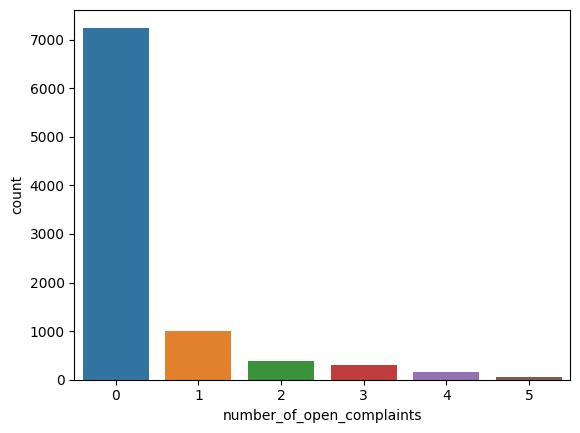

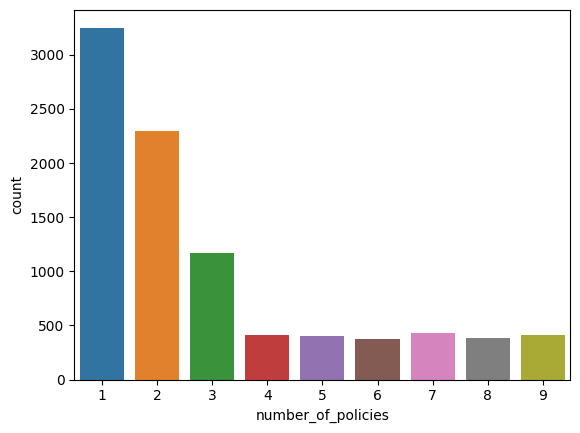

In [11]:
plot_discrete(discrete_df)

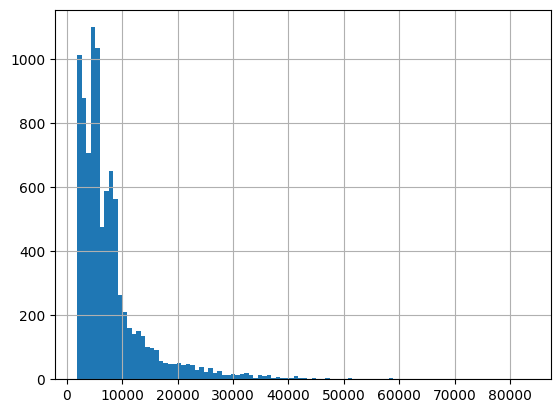

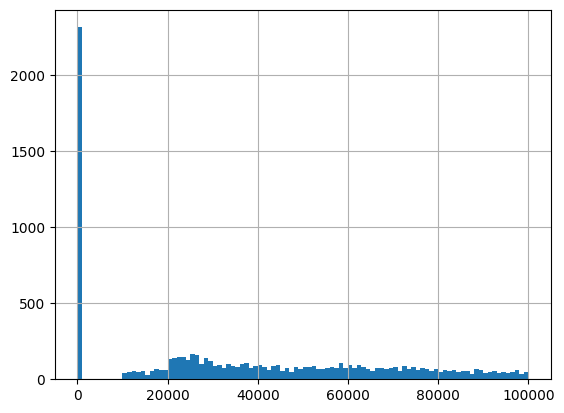

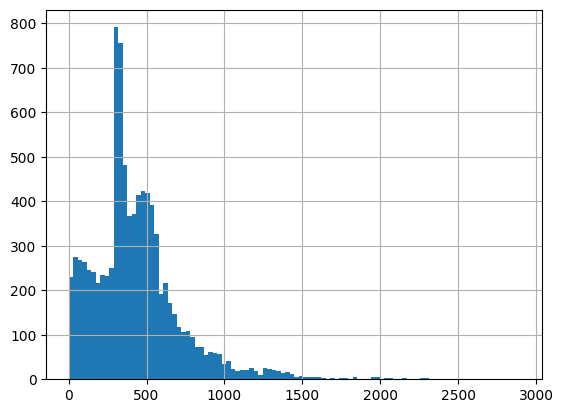

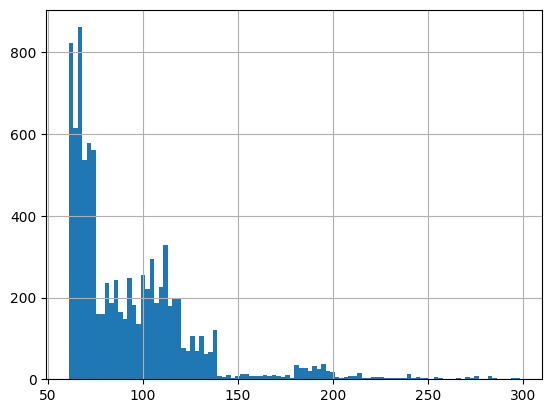

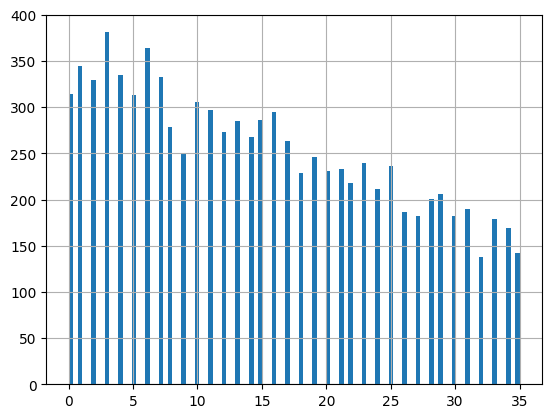

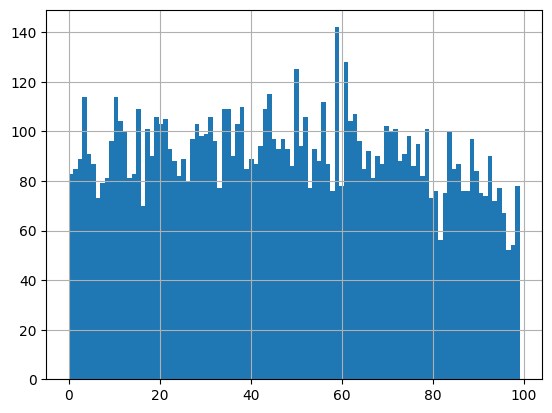

In [12]:
plot_continuous(continuous_df)

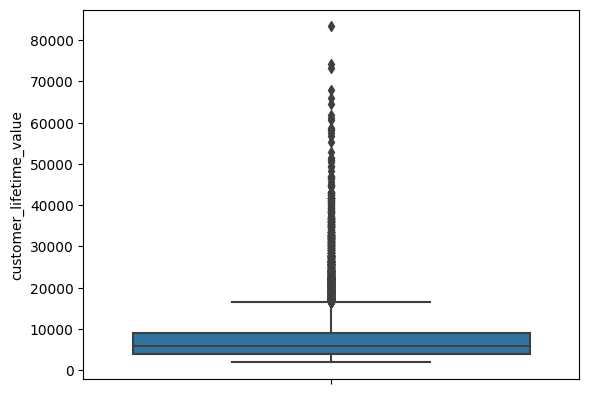

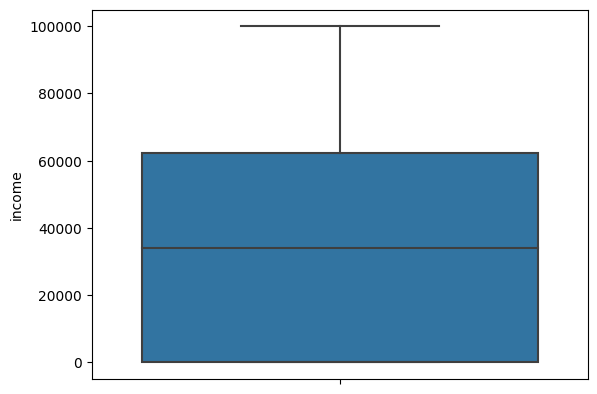

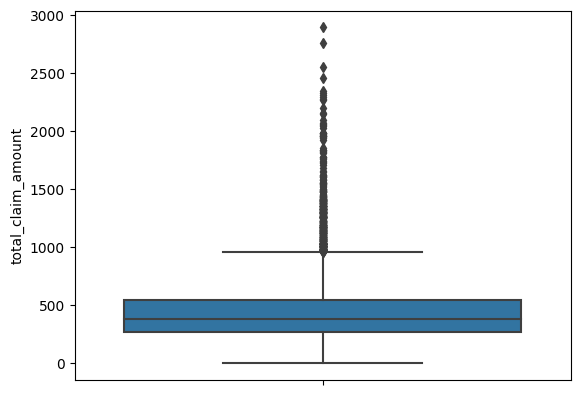

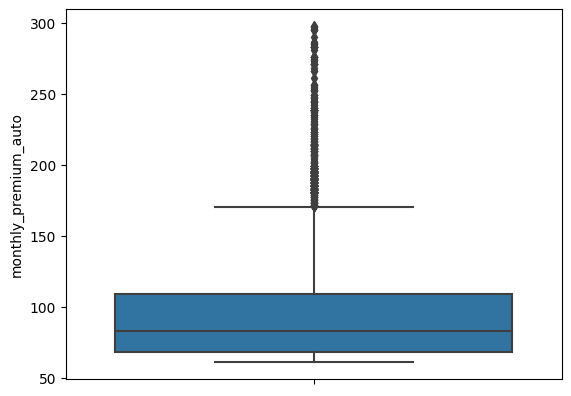

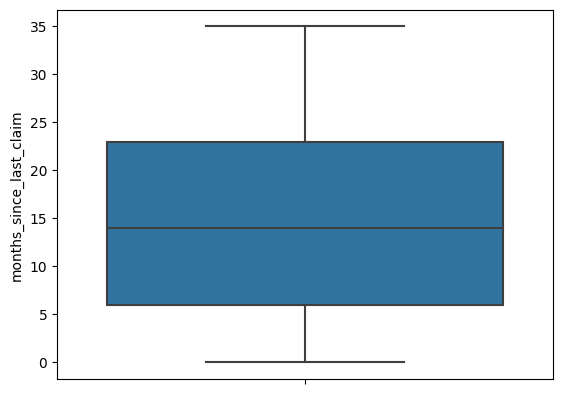

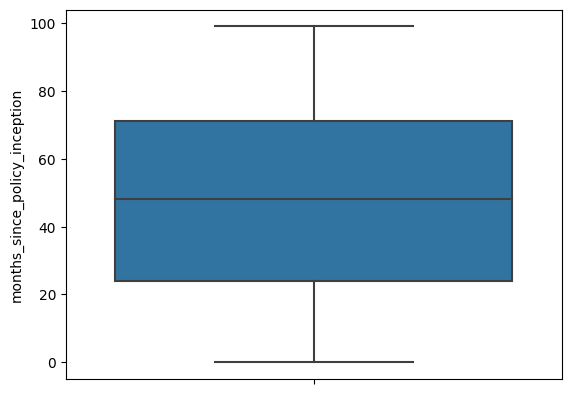

In [13]:
def boxplot(df):
    for i in df.columns:
        sns.boxplot(y=df[i])
        plt.show()

boxplot(continuous_df)

In [15]:
iqr = np.nanpercentile(continuous_df['total_claim_amount'],75) - np.nanpercentile(continuous_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['total_claim_amount'] > 2500]
print(len(extraordinary_points))

960.3997301249999
3


In [16]:
customer_df1 = customer_df[customer_df['total_claim_amount'] <= 2500]
len(customer_df1)

9131

In [17]:
continuous_df.isna().sum()

customer_lifetime_value          0
income                           0
total_claim_amount               0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
dtype: int64

In [18]:
numerical_df.to_csv('numerical.csv', index=False)